# Example 2: Infiltration of Water into a Two-Layered Soil Profile 

This notebook presents steps to replicate example 2 from: *David Rassam, Jirka Šimůnek, Dirk Mallants,and Martinus Th. van Genuchten, The HYDRUS-1D Software Package for Simulating the One-Dimensional Movement of Water, Heat, and Multiple Solutes in Variably-Saturated Media* \
Tutorial \
Version 1.00, July 2018

This example provides insctructions to create a Pydrus model that involves a time-variable atmospheric boundary condition with a soil profile consisting of a 50-cm soil layer of clay loam underlain by a 50-cm soil layer of sandy loam. The soil profile is initially unsaturated, having an initial pressure head of -100 cm. The upper boundary and lower boundary are represented with: 

* Upper BC: Atmospheric Boundary Condition with a Surface Layer (allows accumulation or ponding of water on soil surface).
* Bottom BC: Seepage face boundary condition (water starts draining when the bottom of profile reaches full saturation). 

### 1. Import the Pydrus package

In [1]:
import os
import pandas as pd
import phydrus as ps
%matplotlib inline

### 2. Create the basic model & add time information

In [2]:
# Folder for Hydrus files to be stored
ws = "example_2"
# Path to folder containing hydrus.exe 
exe = os.path.join(os.getcwd(),"../../source/hydrus.exe")  
# Description
desc = "Infiltration of Water into a Two-Layered Soil Profile"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc, 
              mass_units="mmol", time_unit="days", length_unit="cm")
ml.basic_info["lFlux"] = True
ml.basic_info["lShort"] = False

time = [2, 4, 5, 6, 10, 20]
ml.add_time_info(tmax=20, print_array=time, dt=0.001, dtmax=0.1)

[2, 4, 5, 6, 10, 20]

### 3. Add processes and materials

In [3]:
ml.add_waterflow(model=3, top_bc=2, bot_bc=6)

m = ml.get_empty_material_df(n=2)
m.loc[[1, 2]] = [[0.095, 0.41, 0.019, 1.31, 6.24, 0.5],
                 [0.065, 0.41, 0.075, 1.89, 106.1, 0.5]]
ml.add_material(m)

### 4. Add profile information

In [4]:
nodes = 100  # Disctretize soil column into n elements
depth = [-51, -100]  # Depth of the soil column
ihead = -100  # Determine initial Pressure Head
# Create Profile
profile = ps.create_profile(bot=depth, dx=abs(depth[-1] / nodes), h=ihead, mat=m.index)
ml.add_profile(profile)  # Add the profile

### 5. Add observation nodes

In [5]:
# Add observation nodes at depth
ml.add_obs_nodes([0, -50, -100])

### 6. Add atmosphere boundary conditions

In [6]:
time = (2, 5, 7, 10, 20)
bc = {"tAtm": time, "Prec": (6, 10, 2, 0, 0), "rSoil": (0, 0, 0, 0, 1)}
atm = pd.DataFrame(bc, index=time)
ml.add_atmospheric_bc(atm, hcrits=3, hcrita=50000)

### 7. Write hydrus input files and run hydrus

In [7]:
ml.write_input()
ml.simulate()

CompletedProcess(args=['C:\\python\\phydrus\\examples\\hydrus_orig\\../../source/hydrus.exe', 'example_2', '-1'], returncode=0)

### 8. Plot results

(-100.0, 10.0)

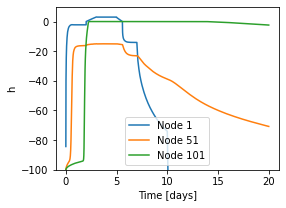

In [8]:
import matplotlib.pyplot as plt
dfs = ml.read_obs_node()
fig, ax = plt.subplots(figsize=(4,3))
for i, df in dfs.items():
    name = "Node {}".format(i)
    df.plot(y="h", ax=ax, label=name, use_index=True)
ax.set_xlabel("Time [{}]".format(ml.basic_info["TUnit"]))
ax.set_ylabel("h")
ax.set_ylim(-100, 10)

<AxesSubplot:xlabel='h [cm]', ylabel='Depth [cm]'>

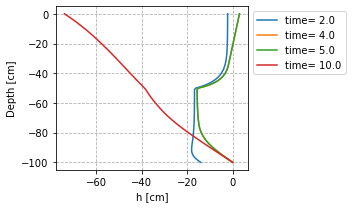

In [9]:
ml.plots.profile_information(times=[2.0, 4.0, 5.0, 10.0])

<AxesSubplot:xlabel='Theta [-]', ylabel='Depth [cm]'>

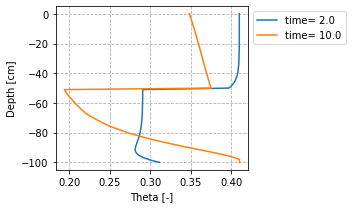

In [10]:
ml.plots.profile_information("Water Content", times=[2.0, 10.0])

array([<AxesSubplot:xlabel='Time [days]', ylabel='Actual Surface Flux'>,
       <AxesSubplot:xlabel='Time [days]', ylabel='Cum. Actual Surface Flux'>],
      dtype=object)

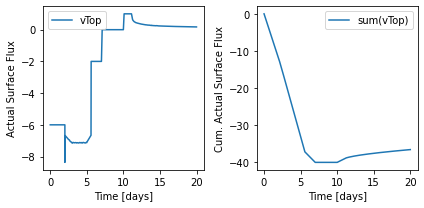

In [11]:
ml.plots.water_flow(data="Actual Surface Flux")

array([<AxesSubplot:xlabel='Time [days]', ylabel='Bottom Flux'>,
       <AxesSubplot:xlabel='Time [days]', ylabel='Cum. Bottom Flux'>],
      dtype=object)

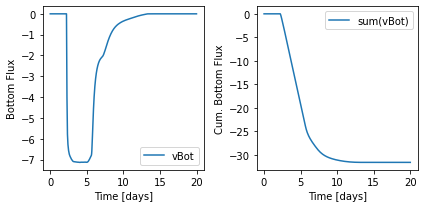

In [12]:
ml.plots.water_flow(data="Bottom Flux")